In [1]:
import pandas as pd                 # for data manipulation
import numpy as np                  # for mathematical calculations
import seaborn as sns               # for data visualization
import matplotlib.pyplot as plt     # For plotting graphs
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

In [3]:
train.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
test.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

SUBSCRIBED is our target variable because  it is not present in the TEST dataset.

Now, let's have a look at the shape!    

In [7]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [8]:
train.dtypes, test.dtypes

(ID             int64
 age            int64
 job           object
 marital       object
 education     object
 default       object
 balance        int64
 housing       object
 loan          object
 contact       object
 day            int64
 month         object
 duration       int64
 campaign       int64
 pdays          int64
 previous       int64
 poutcome      object
 subscribed    object
 dtype: object,
 ID            int64
 age           int64
 job          object
 marital      object
 education    object
 default      object
 balance       int64
 housing      object
 loan         object
 contact      object
 day           int64
 month        object
 duration      int64
 campaign      int64
 pdays         int64
 previous      int64
 poutcome     object
 dtype: object)

Object and Int64 are the two formats of data types.

In [9]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [10]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<Axes: >

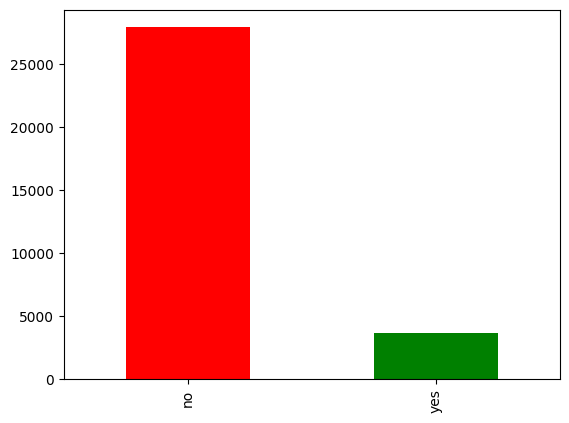

In [11]:
train['subscribed'].value_counts().plot.bar(color=['red','green'])


so according to value counts, 3715 users out of 31647 have subscribed.

now, let's have a look at age group to see how many people belong to a particular age group.

Rather than putting conditions for the age group, we will use seaborn to plot.

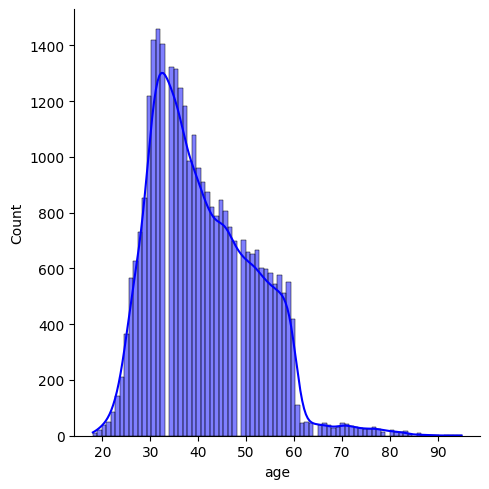

In [12]:
sns.displot(train['age'], kind='hist',kde=True, fill=True, edgecolor='black', color= 'blue')

from the above displot, we infer that most of the clients are aged between 20-60.

now, we will look at a frequency table for job, as it is a categorical variable

<Axes: >

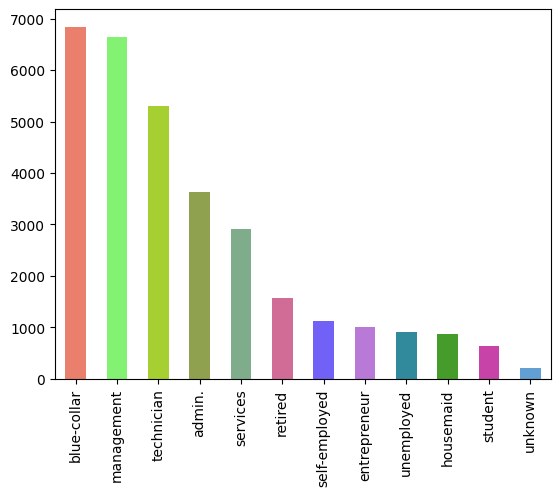

In [13]:
job_counts = train['job'].value_counts()

num_categories = len(job_counts)

random_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(num_categories)]
train['job'].value_counts().plot.bar(color=random_colors)

In [14]:
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

<Axes: >

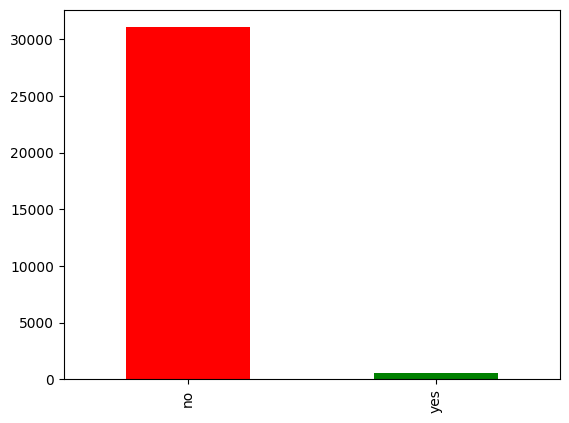

In [15]:
train['default'].value_counts().plot.bar(color = ['red', 'green'])

more than 90% of the clients do not have any dafault history. 

<Axes: >

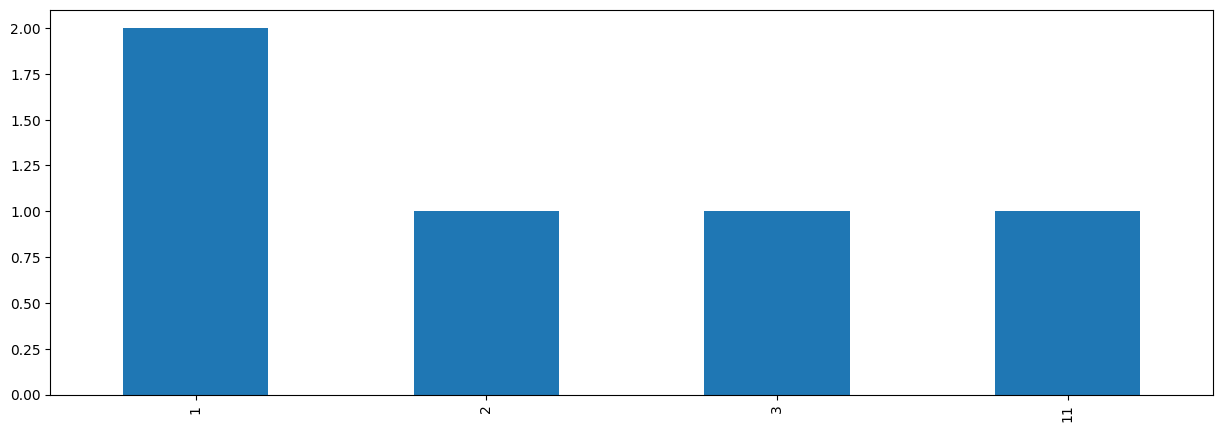

In [16]:
plt.figure(figsize=(15, 5))
data = train.loc[
	(train.job == "unemployed") & (train.marital == "single") & (train.default == "yes")
]
data.campaign.value_counts().plot.bar()

Now we will make use of scatterplots for continuous or numeric variables and crosstabs for categorical variables.

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

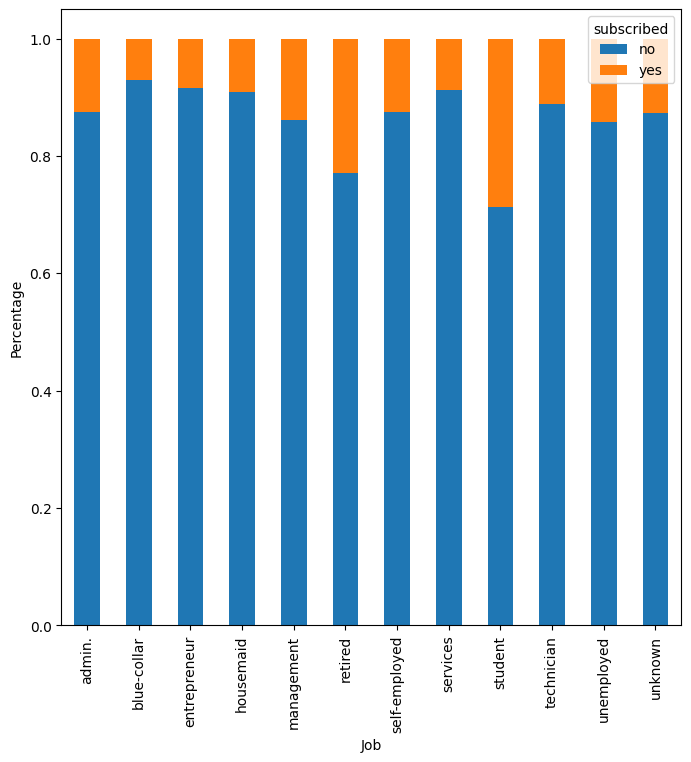

In [17]:
print(pd.crosstab(train['job'], train['subscribed']))

job = pd.crosstab(train['job'], train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))

plt.xlabel('Job')
plt.ylabel('Percentage')

we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next checkpoint: to explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

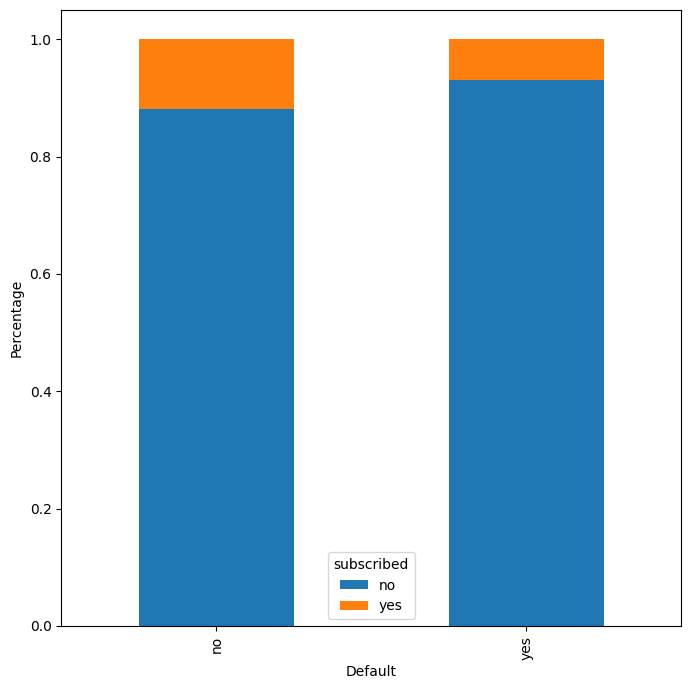

In [18]:
print(pd.crosstab(train['default'], train['subscribed']))

default = pd.crosstab(train['default'], train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))
plt.xlabel('Default')
plt.ylabel('Percentage')

from the above cross tab, we can infer that clients having no previous defaults have higher chances of subscribing to term loan as compared to clients having previous defaults history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated.

In [19]:
train['subscribed'].replace('no', 0, inplace = True)

train['subscribed'].replace('yes', 1, inplace = True)

C:\Users\ashim\AppData\Local\Temp\ipykernel_9012\1140243805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

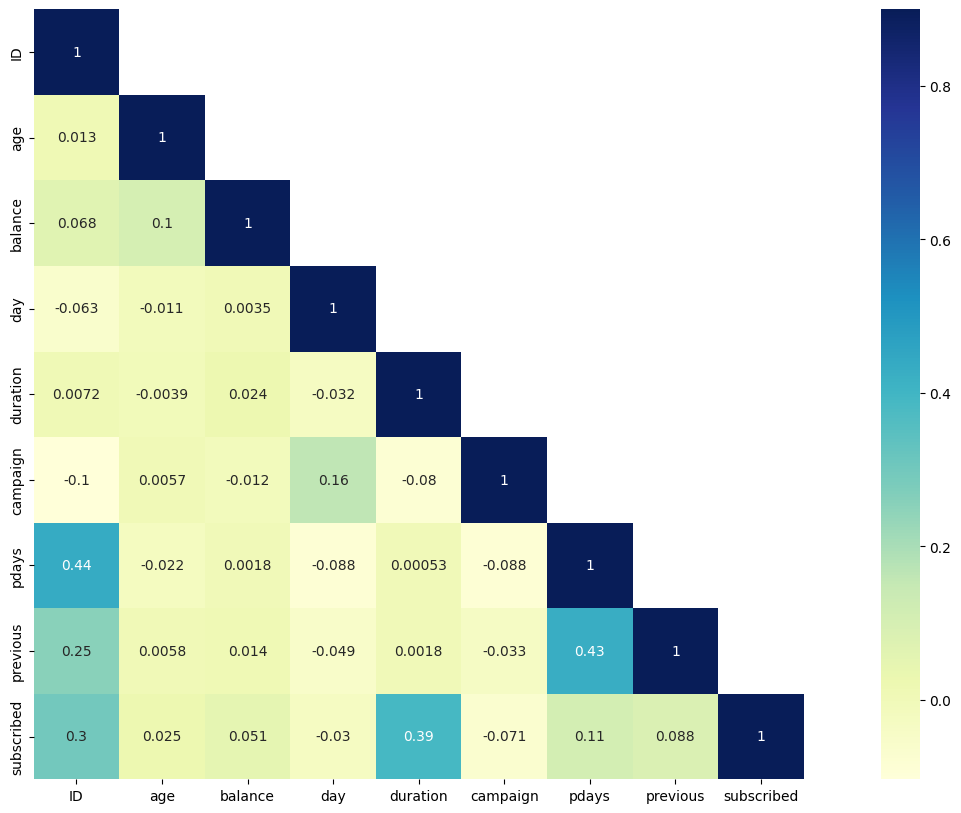

In [20]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask, vmax = .9, square = True, annot = True, cmap = "YlGnBu")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [21]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset.

Now, we will build a predictive model to predict whether a client will subscribe to term deposit or not.

As sklearn model takes only numerical input, we will convert categorical variables to numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

Model Building

In [22]:
target = train['subscribed']
train = train.drop('subscribed', 1)

C:\Users\ashim\AppData\Local\Temp\ipykernel_9012\4025241545.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop('subscribed', 1)


In [23]:
train = pd.get_dummies(train)

Now we will split the train data into training and validation set so that we will  be able to validate the results of our model on the validation set.

We will keep 20% data as the validation set and rest as the training set.

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X_train, X_val, y_train, y_val = train_test_split(train, target, random_state=12, test_size=0.2)

Now our data is ready.
Because it is a classification problem, we will use Logistic Regression model.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lreg = LogisticRegression(max_iter=1000)

In [28]:
import warnings                    
warnings.filterwarnings("ignore")

lreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
prediction = lreg.predict(X_val)
print(prediction)

[0 0 0 ... 1 0 0]


Now we will predict how accurate our predictions are. Let's calculate the accuracy on validation set.

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_val, prediction)

0.8988941548183255

We got an accuracy score of ~90% on the validation dataset. 

Let's try decision tree algo to check if we can get a better accuracy score.

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 11)

In [34]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=11)

In [35]:
predict = clf.predict(X_val)

In [36]:
accuracy_score(y_val, predict)

0.9063191153238547

We got an accuracy of more than 90% on the validation set.

Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [37]:
test = pd.get_dummies(test)

In [38]:
test_prediction = clf.predict(test)

We will save these predictions into a csv file.

In [39]:
submission = pd.DataFrame()

In [40]:
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [41]:
submission['subscribed'].replace(0, 'no', inplace=True)
submission['subscribed'].replace(1, 'yes', inplace=True)

In [42]:
submission.to_csv('submission.csv', index=False, header=True)